# Fraud Detection <a id="goback"> </a>
![title](git2.png)

**Abstract:** <br>
A large number of problems in data mining are related to fraud detection. Fraud is a common problem in auto insurance claims, health insurance claims, credit card transactions, financial transaction and so on. The data in this particular case comes from an actual auto insurance company. Each record represents an insurance claim. The last column in the table tells you whether the claim was fraudulent or not.

There are two datasets (Excel Files) –
1. Insurance Fraud – TRAIN-3000, and
2. Insurance Fraud – TEST-12900.

**Attribute Information: <br>
Input variables:**
1. MONTH: Jan through Dec.
2. WEEKOFMONTH: Continuous – 1 through 5.
3. DAYOFWEEK: Monday through Sunday.
4. MAKE: Acura, BMW, Chevrolet, Dodge, Ford, Toyota, VW, Nissan, etc.
5. ACCIDENTAREA: Urban, Rural.
6. DAYOFWEEKCLAIMED: Monday through Friday.
7. MONTHCLAIMED: Jan through Dec.
8. WEEKOFMONTHCLAIMED: Continuous – 1 through 5.
9. SEX: Male/Female.
10. MARITALSTATUS: Married, Single, Divorced, Widow.
11. AGE: continuous – 0 through 80.
12. FAULT: Policy_Holder, Third_Party.
13. POLICYTYPE: Sport-Collision, Sedan-All_Perils, Sedan-Collision, Sedan-Liability etc.
14. VEHICLECATEGORY: Sport, Sedan, Utility, etc.
15. VEHICLEPRICE: 20000_to_29000,30000_to_39000, 40000_to_59000 etc.
16. REPNUMBER: Continuous – 1 through 16
17. DEDUCTIBLE: Continuous – 300 through 700.
18. DRIVERRATING: Continuous – 1 through 4.
19. DAYS_POLICY_ACCIDENT: none, 1_to_7, 8_to_15, 15_to_30, more_than_30, etc.
20. DAYS_POLICY_CLAIM: none, 1_to_7, 8_to_15, 15_to_30, more_than_30, etc.
21. PASTNUMBEROFCLAIMS: none, 2_to_4, more_than_4, etc.
22. AGEOFVEHICLE: new, 3_years, 4_years, 5_years, 6_years, 7_years, more_than_7, etc.
23. AGEOFPOLICYHOLDER: 16_to_17, 21_to_25, 31_to_35, etc.
24. POLICEREPORTFILED: Yes/No.
25. WITNESSPRESENT: Yes/No.
26. AGENTTYPE: Internal/External.
27. NUMBEROFSUPPLIMENTS: none, 1_to_2, 3_to_5, more_than_5.
28. ADDRESSCHANGE_CLAIM: no_change, under_6_months, 1_year, 2_to_3_years, etc.
29. NUMBEROFCARS: 1_vehicle, 2_vehicles, 3_to_4 etc.
30. YEAR: Continuous – 1994 through 1996.
31. BASEPOLICY: Collison, All_Perils, Liability etc.

**Output variable (desired target):** <br>
32. FRAUDFOUND: Yes/No.

#### References:  <br />
- [SckitLearn Library](https://scikit-learn.org/stable/index.html) <br />
- [Pandas Library : DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) <br />

**Index** 
- [Data Import](#importdata)
- [Data Cleaning](#cleandata)
- [Dealing with Categorical Data: OneHotEncoder](#encoding)
- [Model Development](#model)
- [Evaluating Default Models](#evaluate)
- [Hyperparameter Tuning](#hyper)
    - [Grid Search CV ](#grid)
    - [Random Search CV](#random)
- [Model Development with Grid/Random Search Parameters](#modeldev)

In [1]:
# Libraries
# Data Manipulation
import numpy as np
import pandas as pd

# Machine Learning
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Data Visualization
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

# To remove warnings 
import warnings
warnings.filterwarnings("ignore")

# Function to evaluate ML Model
def evaluate_model(model,XTrain,YTrain,XTest,YTest):
    #Training Prediction Accuracy
    TrainPred=model.predict(XTrain)
    Training_Acc_Score=metrics.accuracy_score(YTrain,TrainPred)
    
    #Testing Prediction Accuracy
    PredY=model.predict(XTest)
    Testing_Acc_Score=metrics.accuracy_score(YTest,PredY)
    Testing_Class_Report=metrics.classification_report(YTest,PredY)
    Testing_Confusion_Matrix=metrics.confusion_matrix(YTest,PredY)
    
    print("Training Data Accuracy:",Training_Acc_Score,)
    print()
    print("Testing Data Accuracy:\n",Testing_Acc_Score,
         "\nTesting_Class_Report:\n",Testing_Class_Report,
         "\nTesting_Confusion_Matrix:\n",Testing_Confusion_Matrix)

## Import Datasets <a id="importdata">

In [5]:
Train_csv_loc=r"Data/Insurance Fraud - TRAIN-3000.csv"
Test_csv_loc=r"Data/Insurance Fraud -TEST-12900.csv"

Train_df=pd.read_csv(Train_csv_loc)
Test_df=pd.read_csv(Test_csv_loc)

Train_df.head()

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [6]:
Test_df.head()

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [7]:
print("Size of Training data:",Train_df.shape,"\n"
      "Size of Testing data:",Test_df.shape)

Size of Training data: (2999, 32) 
Size of Testing data: (12918, 32)


In [8]:
Train_df.info()
# Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [30]:
# sns.heatmap(Train_df.corr(),annot=True)

In [6]:
Train_df.describe()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,2.781260,2.671224,40.055352,8.511837,407.302434,2.496832,1995.114038
std,1.286055,1.261614,13.497026,4.601437,41.847258,1.118365,0.606007
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,4.000000,400.000000,1.000000,1995.000000
50%,3.000000,3.000000,38.000000,9.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,49.000000,12.000000,400.000000,3.000000,1995.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [7]:
Train_df["FRAUDFOUND"].value_counts(normalize=True)*100

No     86.695565
Yes    13.304435
Name: FRAUDFOUND, dtype: float64

[Go Back](#goback)

## Data Cleaning <a id="cleandata">

In [6]:
#Data Cleaning
Train_df.shape

(2999, 32)

In [7]:
#Drop Duplicate Rows
# Train_df.shape
Train_df.drop_duplicates()
Train_df.shape

(2999, 32)

In [8]:
# Null values check
Train_df.isnull().sum().sort_values(ascending=True)

MONTH                   0
YEAR                    0
NUMBEROFCARS            0
ADDRESSCHANGE_CLAIM     0
NUMBEROFSUPPLIMENTS     0
AGENTTYPE               0
WITNESSPRESENT          0
POLICEREPORTFILED       0
AGEOFPOLICYHOLDER       0
AGEOFVEHICLE            0
PASTNUMBEROFCLAIMS      0
DAYS_POLICY_CLAIM       0
DAYS_POLICY_ACCIDENT    0
DRIVERRATING            0
DEDUCTIBLE              0
REPNUMBER               0
VEHICLEPRICE            0
VEHICLECATEGORY         0
POLICYTYPE              0
FAULT                   0
AGE                     0
MARITALSTATUS           0
SEX                     0
WEEKOFMONTHCLAIMED      0
MONTHCLAIMED            0
DAYOFWEEKCLAIMED        0
ACCIDENTAREA            0
MAKE                    0
DAYOFWEEK               0
WEEKOFMONTH             0
BASEPOLICY              0
FRAUDFOUND              0
dtype: int64

[Go Back](#goback)

## Dealing with categorical data points <a id="encoding">

In [8]:
list(Train_df.columns.values)
# CategoricalVariables=['MONTH']
CategoricalVariables=['MONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED',
                      'MONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'FAULT', 'POLICYTYPE', 
                      'VEHICLECATEGORY', 'VEHICLEPRICE', 'DAYS_POLICY_ACCIDENT', 
                      'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 
                      'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE',
                      'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'BASEPOLICY']
# OneHotEncoding
Encoding1=OneHotEncoder(sparse=False,handle_unknown='ignore')
# output=Encoding1.fit_transform(Train_df[CategoricalVariables])
# output2=Encoding1.fit_transform(Test_df[CategoricalVariables])

output=pd.DataFrame(Encoding1.fit_transform(Train_df[CategoricalVariables]),
                    columns=Encoding1.get_feature_names_out(),
                    index=Train_df.index)
# output2=pd.DataFrame(Encoding1.fit_transform(Test_df[CategoricalVariables]),
#                      columns=Encoding1.get_feature_names_out(),
#                      index=Test_df.index)
output2=pd.DataFrame(Encoding1.transform(Test_df[CategoricalVariables]),
                     columns=Encoding1.get_feature_names_out(),
                     index=Test_df.index)
# Encoding1.get_feature_names_out()
print(output.shape,output2.shape,Train_df.shape,Test_df.shape)

Encoded_Train_df=pd.concat([Train_df,output],axis=1)
Encoded_Test_df=pd.concat([Test_df,output2],axis=1)

Mismatch_Columns=list(set(output2.columns)-set(output.columns))

#Add these columns to Train Dataset
# Encoded_Train_df[Mismatch_Columns]=0

(2999, 132) (12918, 132) (2999, 32) (12918, 32)


In [9]:
# Validating if before encoding and after encoding datasets have same shape for Training & Testing datasets
Mismatch_Columns=list(set(output2.columns)-set(output.columns))
print(Mismatch_Columns)

[]


In [10]:
print(Encoded_Train_df.shape,Encoded_Test_df.shape)
# Successfully columns are same

(2999, 164) (12918, 164)


In [11]:
# Remove Categorical Variables as Encoded dataset added
Encoded_Train_df=Encoded_Train_df.drop(columns=CategoricalVariables)
Encoded_Test_df=Encoded_Test_df.drop(columns=CategoricalVariables)
print(Encoded_Train_df.shape,Encoded_Test_df.shape)

(2999, 140) (12918, 140)


[Go Back](#goback)

## Model Development <a id="model">

In [12]:
# #Train test Split
# XTrain,XTest,YTrain,YTest=train_test_split(TrainX,TrainY,test_size=0.3)

#Dividing Dataset into Training and Testing Data
TrainX=Encoded_Train_df.drop(columns="FRAUDFOUND").copy()
TrainY=Encoded_Train_df["FRAUDFOUND"].copy()

TestX=Encoded_Test_df.drop(columns="FRAUDFOUND").copy()
TestY=Encoded_Test_df["FRAUDFOUND"].copy()

In [13]:
#Decision Tree
dt=DecisionTreeClassifier()
dt.fit(TrainX,TrainY)

DecisionTreeClassifier()

In [14]:
# Random Forest
rt=RandomForestClassifier()
rt.fit(TrainX,TrainY)

RandomForestClassifier()

[Go Back](#goback)

 ## Evaluating Default Models <a id="evaluate">
Training file taking as TrainDataset <br>
Testing file taking as TestDataset as Y(Target) is given

In [15]:
evaluate_model(dt,TrainX,TrainY,TestX,TestY)

Training Data Accuracy: 1.0

Testing Data Accuracy:
 0.8831862517417557 
Testing_Class_Report:
               precision    recall  f1-score   support

          No       1.00      0.88      0.94     12420
         Yes       0.23      0.89      0.37       498

    accuracy                           0.88     12918
   macro avg       0.61      0.89      0.65     12918
weighted avg       0.97      0.88      0.91     12918
 
Testing_Confusion_Matrix:
 [[10965  1455]
 [   54   444]]


In [16]:
evaluate_model(rt,TrainX,TrainY,TestX,TestY)

Training Data Accuracy: 1.0

Testing Data Accuracy:
 0.9633844248335656 
Testing_Class_Report:
               precision    recall  f1-score   support

          No       0.99      0.97      0.98     12420
         Yes       0.52      0.85      0.64       498

    accuracy                           0.96     12918
   macro avg       0.75      0.91      0.81     12918
weighted avg       0.98      0.96      0.97     12918
 
Testing_Confusion_Matrix:
 [[12023   397]
 [   76   422]]


[Go Back](#goback)

## Hyperparameter Tuning  <a id="hyper">

### Grid Search CV  <a id="grid">

In [18]:
%%time
# GridSearchCV : Exhaustive Approach

from sklearn.model_selection import GridSearchCV

#Decision Tree
dt_para_set={'criterion':['gini','entropy'],
         'max_depth':range(5,30,5),
         'min_samples_leaf':range(10,300,10)}


dt_GridSearchCV=GridSearchCV(dt,dt_para_set)
dt_GridSearchCV.fit(TrainX,TrainY)
print("Best set of parameters for dt: ",dt_GridSearchCV.best_params_,
      "\nBest Score : ",dt_GridSearchCV.best_score_)

print()
print("===============================================================================================================")
print()

#Random Forest
rt_para_set={'n_estimators':range(50,200,50),
            'criterion':['entropy','gini','log_loss'],
            'max_depth':range(5,30,5),
            'min_samples_leaf':range(10,300,10)}
rt_GridSearchCV=GridSearchCV(rt,rt_para_set)
rt_GridSearchCV.fit(TrainX,TrainY)
print('Best set of parameters for rt:',rt_GridSearchCV.best_params_,
     '\nBest score: ',rt_GridSearchCV.best_score_)

Best set of parameters for dt:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30} 
Best Score :  0.8869610461880914


Best set of parameters for rt: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 50} 
Best score:  0.8746243739565942
CPU times: total: 20min 34s
Wall time: 20min 42s


In [19]:
#Grid CV Test Accuracy for Decision Tree and Random Forest
print('Decision Tree Test Accuracy: ',dt_GridSearchCV.score(TestX,TestY))
print('RandomForest Test Accuracy:',rt_GridSearchCV.score(TestX,TestY))

Decision Tree Test Accuracy:  0.8773803994426381
RandomForest Test Accuracy: 0.9563399907106364


[Go Back](#goback)

### Random Search CV <a id="random">

In [20]:
%%time
# RandomizedSearchCV : Randomized Approach

from sklearn.model_selection import RandomizedSearchCV

#Decision Tree
dt_RandomizedSearchCV=RandomizedSearchCV(dt,dt_para_set)
dt_RandomizedSearchCV.fit(TrainX,TrainY)
print("Best set of parameters for dt: ",dt_RandomizedSearchCV.best_params_,
      "\nBest Score : ",dt_RandomizedSearchCV.best_score_)

print()
print()

#Random Forest
rt_RandomizedSearchCV=RandomizedSearchCV(rt,rt_para_set)
rt_RandomizedSearchCV.fit(TrainX,TrainY)

print("Best set of parameters for rt: ",rt_RandomizedSearchCV.best_params_,
      "\nBest Score : ",rt_RandomizedSearchCV.best_score_)

Best set of parameters for dt:  {'min_samples_leaf': 50, 'max_depth': 10, 'criterion': 'entropy'} 
Best Score :  0.885962715637173


Best set of parameters for rt:  {'n_estimators': 150, 'min_samples_leaf': 100, 'max_depth': 25, 'criterion': 'log_loss'} 
Best Score :  0.8669560378408459
CPU times: total: 6.61 s
Wall time: 6.64 s


In [21]:
#Random CV Test Accuracy for Decision Tree and Random Forest
print('Decision Tree Test Accuracy: ',dt_RandomizedSearchCV.score(TestX,TestY))
print('RandomForest Test Accuracy:',rt_RandomizedSearchCV.score(TestX,TestY))

Decision Tree Test Accuracy:  0.8841151881096145
RandomForest Test Accuracy: 0.9614491407338597


[Go Back](#goback)

## Model Development with Grid/Random Search Parameters <a id="modeldev">

In [22]:
#Using Grid and Random Search CV parameters for modelling
#Decision Tree

dt_using_Grid=DecisionTreeClassifier(**dt_GridSearchCV.best_params_)
dt_using_Grid.fit(TrainX,TrainY)
dt_using_Rand=DecisionTreeClassifier(**dt_RandomizedSearchCV.best_params_)
dt_using_Rand.fit(TrainX,TrainY)

print("DECISION TREE CLASSIFIER")
print("Using Grid Search CV \n")
evaluate_model(dt_using_Grid,TrainX,TrainY,TestX,TestY)
cv_dt_Grid = cross_val_score(dt_using_Grid, TrainX, TrainY, cv=5, scoring="balanced_accuracy")
print("\nCross Validation score for Random Forest with GridSearch CV parameters: ",cv_dt_Grid)
print("-------------------------------------------------------------------------------------------------")
print("Using Random Search CV \n")
evaluate_model(dt_using_Rand,TrainX,TrainY,TestX,TestY)
cv_dt_Rand = cross_val_score(dt_using_Rand, TrainX, TrainY, cv=5, scoring="balanced_accuracy")
print("\nCross Validation score for Random Forest with GridSearch CV parameters: ",cv_dt_Rand)


DECISION TREE CLASSIFIER
Using Grid Search CV 

Training Data Accuracy: 0.891297099033011

Testing Data Accuracy:
 0.8773803994426381 
Testing_Class_Report:
               precision    recall  f1-score   support

          No       0.97      0.90      0.93     12420
         Yes       0.12      0.35      0.18       498

    accuracy                           0.88     12918
   macro avg       0.55      0.62      0.56     12918
weighted avg       0.94      0.88      0.90     12918
 
Testing_Confusion_Matrix:
 [[11162  1258]
 [  326   172]]

Cross Validation score for Random Forest with GridSearch CV parameters:  [0.74615385 0.69807692 0.54375    0.5        0.55696203]
-------------------------------------------------------------------------------------------------
Using Random Search CV 

Training Data Accuracy: 0.8916305435145049

Testing Data Accuracy:
 0.8841151881096145 
Testing_Class_Report:
               precision    recall  f1-score   support

          No       0.97      0.91   

In [23]:
#Using Grid and Random Search CV parameters for modelling
#Random Forest
rt_using_Grid=RandomForestClassifier(**rt_GridSearchCV.best_params_)
rt_using_Grid.fit(TrainX,TrainY)
rt_using_Rand=RandomForestClassifier(**rt_RandomizedSearchCV.best_params_)
rt_using_Rand.fit(TrainX,TrainY)

print("RANDOM FOREST CLASSIFIER")
print("Using Grid Search CV \n")
evaluate_model(rt_using_Grid,TrainX,TrainY,TestX,TestY)
cv_rt_Grid = cross_val_score(rt_using_Grid, TrainX, TrainY, cv=5, scoring="balanced_accuracy")
print("\nCross Validation score for Random Forest with GridSearch CV parameters: ",cv_rt_Grid)
print("-------------------------------------------------------------------------------------------------")
print("Using Random Search CV \n")
evaluate_model(rt_using_Rand,TrainX,TrainY,TestX,TestY)
cv_rt_Rand = cross_val_score(rt_using_Rand, TrainX, TrainY, cv=5, scoring="balanced_accuracy")
print("\nCross Validation score for Random Forest with RandomSearch CV parameters: ",cv_rt_Rand)

RANDOM FOREST CLASSIFIER
Using Grid Search CV 

Training Data Accuracy: 0.8896298766255418

Testing Data Accuracy:
 0.9498374361356247 
Testing_Class_Report:
               precision    recall  f1-score   support

          No       0.97      0.98      0.97     12420
         Yes       0.27      0.17      0.21       498

    accuracy                           0.95     12918
   macro avg       0.62      0.58      0.59     12918
weighted avg       0.94      0.95      0.94     12918
 
Testing_Confusion_Matrix:
 [[12184   236]
 [  412    86]]

Cross Validation score for Random Forest with GridSearch CV parameters:  [0.52403846 0.54903846 0.53125    0.5        0.53164557]
-------------------------------------------------------------------------------------------------
Using Random Search CV 

Training Data Accuracy: 0.8669556518839613

Testing Data Accuracy:
 0.9614491407338597 
Testing_Class_Report:
               precision    recall  f1-score   support

          No       0.96      1.00  

[Go Back](#goback)

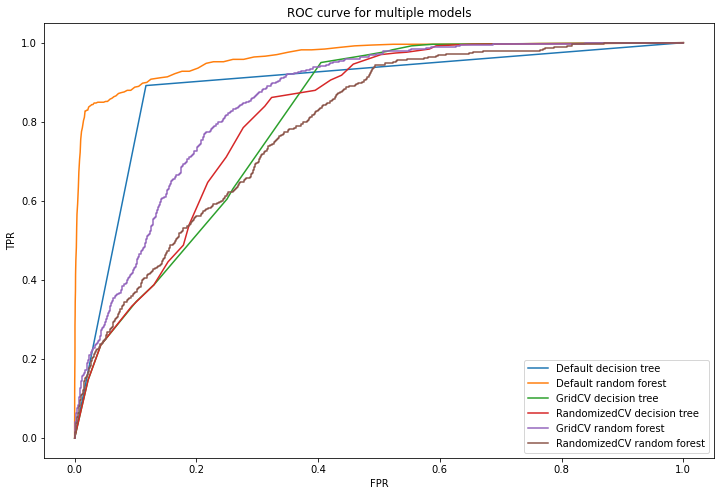

In [24]:
# Estimated ROC Curves by transforming dataset into 0,1
Trail=TestY
Trail=Trail.replace(to_replace=['No','Yes'],value=[0,1])
# print(Trail)

import matplotlib.pyplot as plt

PredY=dt.predict_proba(TestX)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(Trail,PredY)

PredY=rt.predict_proba(TestX)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Trail,PredY)

PredY=dt_using_Grid.predict_proba(TestX)[:,1]
fpr3, tpr3, _ = metrics.roc_curve(Trail,PredY)

PredY=dt_using_Rand.predict_proba(TestX)[:,1]
fpr4, tpr4, _ = metrics.roc_curve(Trail,PredY)

PredY=rt_using_Grid.predict_proba(TestX)[:,1]
fpr5, tpr5, _ = metrics.roc_curve(Trail,PredY)

PredY=rt_using_Rand.predict_proba(TestX)[:,1]
fpr6, tpr6, _ = metrics.roc_curve(Trail,PredY)

plt.figure(figsize=(12,8))
plt.plot(fpr1, tpr1,label="Default decision tree")
plt.plot(fpr2, tpr2,label="Default random forest")
plt.plot(fpr3, tpr3,label="GridCV decision tree")
plt.plot(fpr4, tpr4,label="RandomizedCV decision tree")
plt.plot(fpr5, tpr5,label="GridCV random forest")
plt.plot(fpr6, tpr6,label="RandomizedCV random forest")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for multiple models')
plt.legend()

plt.show()
